In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib;
import numpy as np
import random
import math
import skfuzzy as fuzz
from tqdm import tqdm_notebook
from environment import *
from experiment import *

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
x_tr = np.linspace(0, 1, 11)

In [3]:
tr_v_bad = fuzz.trapmf(x_tr, [0., 0., 0.1, 0.2])
tr_bad = fuzz.trapmf(x_tr, [0.1, 0.2, 0.4, 0.5])
tr_norm = fuzz.trapmf(x_tr, [0.4, 0.5, 0.6, 0.7])
tr_good = fuzz.trapmf(x_tr, [0.6, 0.7, 0.8, 0.9])
tr_v_good = fuzz.trapmf(x_tr, [0.8, 0.9, 1., 1.])

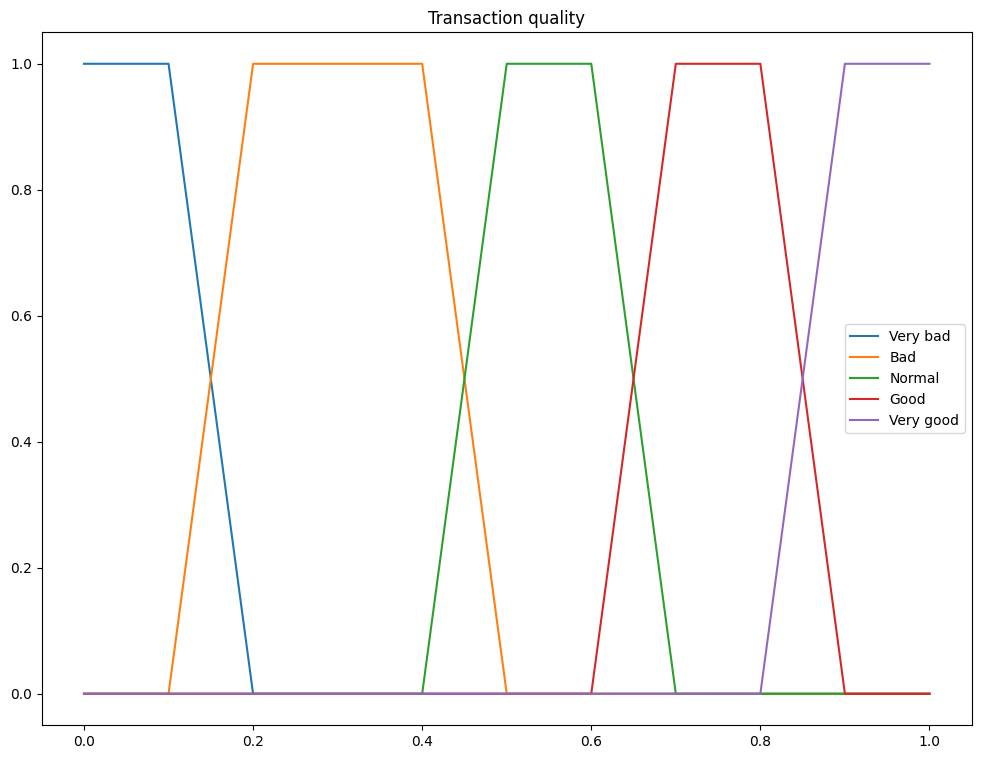

In [4]:
plt.figure(figsize=(12,9))
plt.plot(x_tr, tr_v_bad, linewidth=1.5, label='Very bad')
plt.plot(x_tr, tr_bad, linewidth=1.5, label='Bad')
plt.plot(x_tr, tr_norm, linewidth=1.5, label='Normal')
plt.plot(x_tr, tr_good, linewidth=1.5, label='Good')
plt.plot(x_tr, tr_v_good, linewidth=1.5, label='Very good')
plt.title('Transaction quality')
plt.legend(loc='right')
# plt.savefig('mbfs.png', bbox_inches='tight')
plt.show()

In [5]:
def convert_type2(t):
    return np.array([t[0], t[2], t[3], t[5]]), np.array([t[1], t[2], t[3], t[4]])

def trapmf2(t, x_tr=np.linspace(0, 1, 11)):
    t1, t2 = convert_type2(t)
    return fuzz.trapmf(x_tr, t1), fuzz.trapmf(x_tr, t2)

In [6]:
x_tr_2 = np.array([0., 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 1.])
tr_v_bad_2 = trapmf2(x_tr=x_tr_2, t=np.array([0., 0., 0., 0.1, 0.2, 0.3]))
tr_bad_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.05, 0.15, 0.2, 0.4, 0.45, 0.5]))
tr_norm_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.3, 0.4, 0.5, 0.6, 0.65, 0.75]))
tr_good_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.55, 0.65, 0.7, 0.8, 0.85, 0.9]))
tr_v_good_2 = trapmf2(x_tr=x_tr_2, t=np.array([0.8, 0.85, 0.9, 1., 1., 1.]))

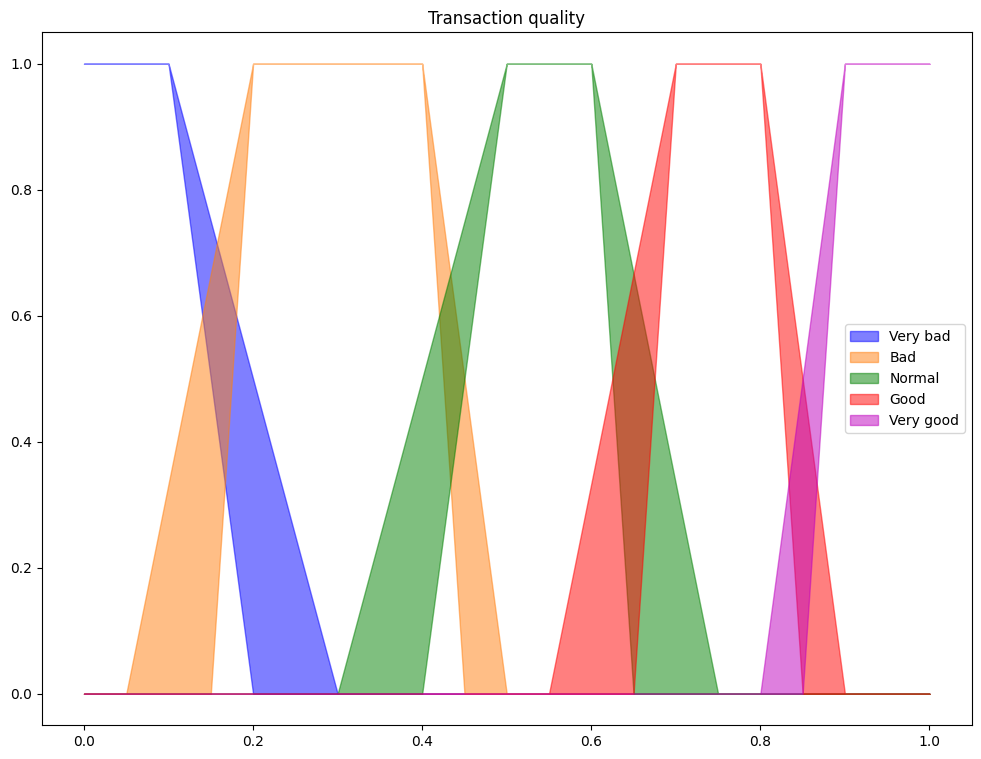

In [7]:
plt.figure(figsize=(12,9))
plt.fill_between(x_tr_2, tr_v_bad_2[0], tr_v_bad_2[1], color='b', alpha=0.5, label='Very bad')
plt.fill_between(x_tr_2, tr_bad_2[0], tr_bad_2[1], color='C1', alpha=0.5, label='Bad')
plt.fill_between(x_tr_2, tr_norm_2[0], tr_norm_2[1], color='g', alpha=0.5, label='Normal')
plt.fill_between(x_tr_2, tr_good_2[0], tr_good_2[1], color='r', alpha=0.5, label='Good')
plt.fill_between(x_tr_2, tr_v_good_2[0], tr_v_good_2[1], color='m', alpha=0.5, label='Very good')
plt.title('Transaction quality')
plt.legend(loc='right')
# plt.savefig('mbfs_type_2', bbox_inches='tight')
plt.show()

In [8]:
SIM_NUM = 10000
RATE = 0.15
TRUST_UPDATE = 100
PEER_NUM = 1000
PRE_TRUSTED_RATE = 0.05
MIN_CAT_PEER_RATE = 0.05
CATS_NUM = 10

In [25]:
rates = np.array([0.1])
nums = np.arange(1000, 3501, 500)
methods = ['centroid', 'bisector', 'mom', 'som', 'lom']

In [26]:
rates

array([0.1])

In [31]:
eigen = EigenTrustEnv(num_peers=1000, malicious_rate=0.15, pre_trusted_rate=0.05,
                        min_cat_peer_rate=0.05, num_cats=10, trust_upd=100)


In [ ]:
eigen.simulate(100)

  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

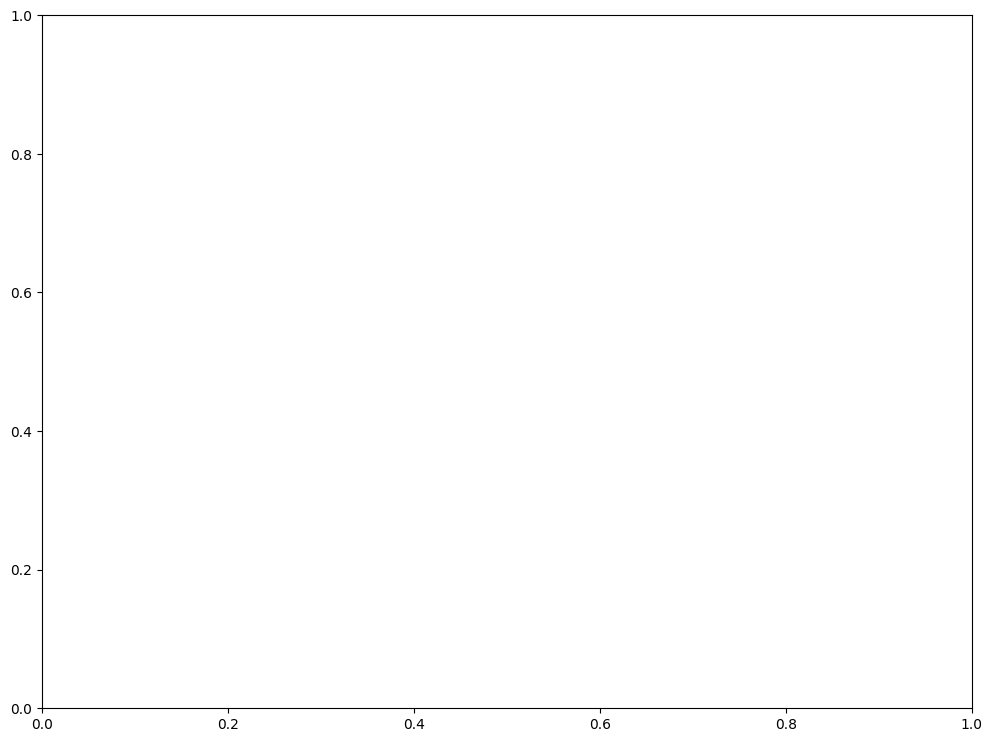

In [28]:
plot_malicious_rate_exp(res_dict_1)

In [ ]:
res_dict_2 = convergence_exp(nums, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                                cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_convergence_exp(res_dict_2)

In [ ]:
res_dict_3 = robustness_exp(nums, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                                cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_robust_exp(res_dict_3)

In [ ]:
res_dict_11 = malicious_rate_exp_1(rates, sim_num=SIM_NUM, peer_num=PEER_NUM, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                                cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_malicious_rate_exp_1(res_dict_11)

In [ ]:
res_dict_21 = convergence_exp_1(nums, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                                cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_convergence_exp_1(res_dict_21)

In [ ]:
res_dict_31 = robustness_exp_1(nums, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                                cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_robust_exp_1(res_dict_31)

In [ ]:
res = defuzz_exp(methods, peer_num=PEER_NUM, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                            cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_defuzz_exp(methods, res)

In [ ]:
res_dict_defuzz_1 = defuzz_malicious_rate_exp(rates, peer_num=PEER_NUM, sim_num=SIM_NUM, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                            cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_defuzz_malicious_rate_exp(res_dict_defuzz_1)

In [ ]:
res_dict_defuzz_2 = defuzz_robustness_exp(nums, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                            cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_defuzz_robust_exp(res_dict_defuzz_2)

In [ ]:
res_dict_type2_1 = malicious_rate_exp_2(rates, peer_num=PEER_NUM, sim_num=SIM_NUM, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                            cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_malicious_rate_exp_2(res_dict_type2_1)

In [ ]:
res_dict_type2_2 = robustness_exp_2(nums, sim_num=SIM_NUM, rate=RATE, min_cat_peer_rate=MIN_CAT_PEER_RATE, 
                            cats_num=CATS_NUM, trust_upd=TRUST_UPDATE, pre_trusted_rate=PRE_TRUSTED_RATE)

In [ ]:
plot_robust_exp_2(res_dict_type2_2)